JERZY ANDRZEJEWSKI 230347

TASK 1

In [2]:
import skimage
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_mean, threshold_otsu, try_all_threshold

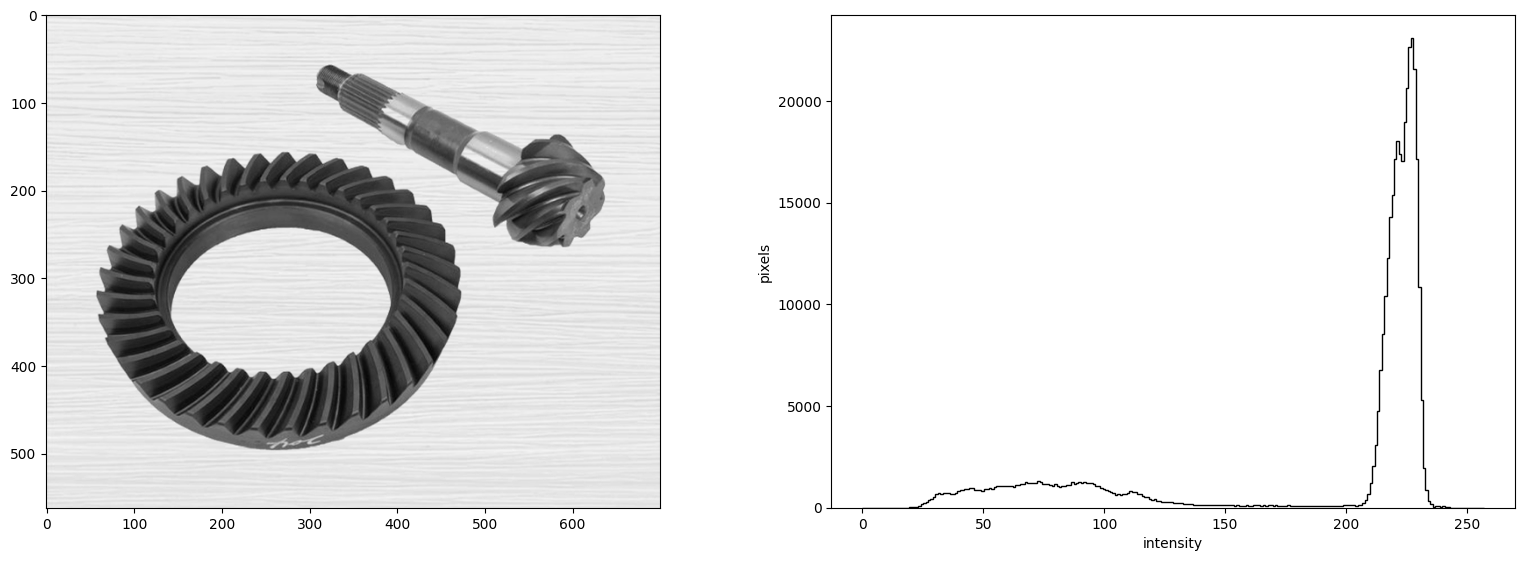

In [3]:
gears = skimage.io.imread('gears1.png')

counts, bins = np.histogram(gears, bins=256, range=(0,257))

fig, (imgplot, histogram) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(19.4)
fig.set_figheight(6.4)
imgplot.imshow(gears, cmap = 'gray')
histogram.hist(bins[:-1], bins, weights=counts, histtype='step', color='black')
histogram.set_xlabel('intensity')
histogram.set_ylabel('pixels')
plt.show()

threshold_mean 187.38784443314694
threshold_otsu 149


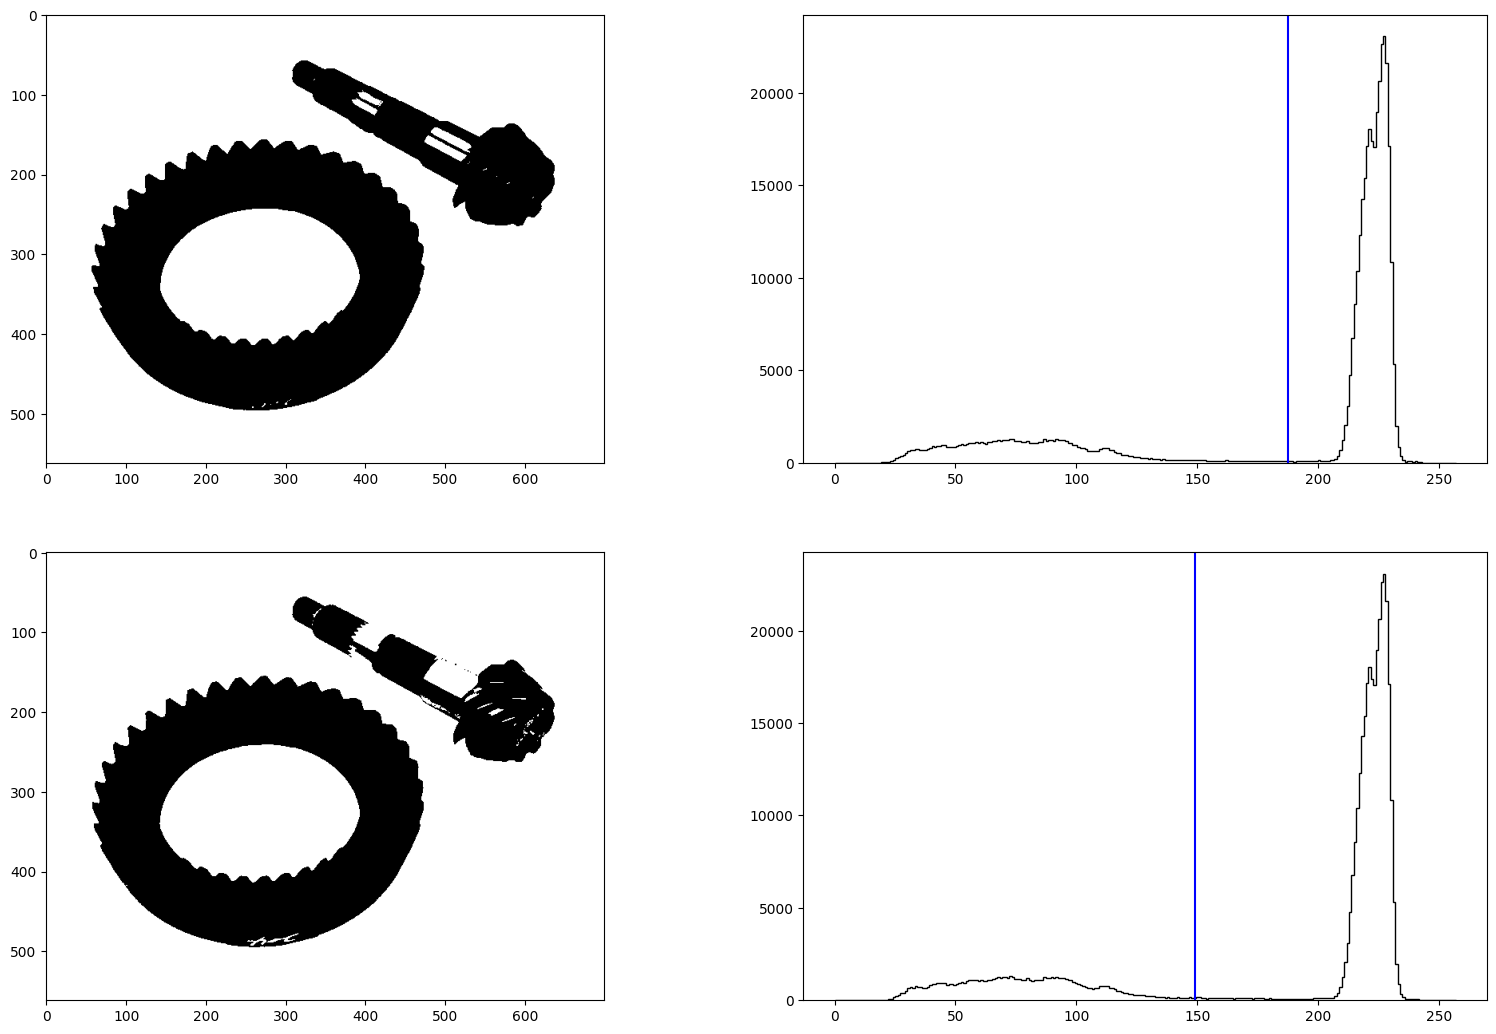

In [4]:
thresh_mean = threshold_mean(gears)
thresh_otsu = threshold_otsu(gears)

print(f'threshold_mean {thresh_mean}')
print(f'threshold_otsu {thresh_otsu}')
mean = gears > thresh_mean
otsu = gears > thresh_otsu

fig, ((imgplot1, histogram1), (imgplot2, histogram2)) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(19.4)
fig.set_figheight(12.8)
imgplot1.imshow(mean, cmap = 'gray')
histogram1.hist(bins[:-1], bins, weights=counts, histtype='step', color='black')
histogram1.axvline(x = thresh_mean, color = 'b')
imgplot2.imshow(otsu, cmap = 'gray')
histogram2.hist(bins[:-1], bins, weights=counts, histtype='step', color='black')
histogram2.axvline(x = thresh_otsu, color = 'b')
plt.show()

TASK 2

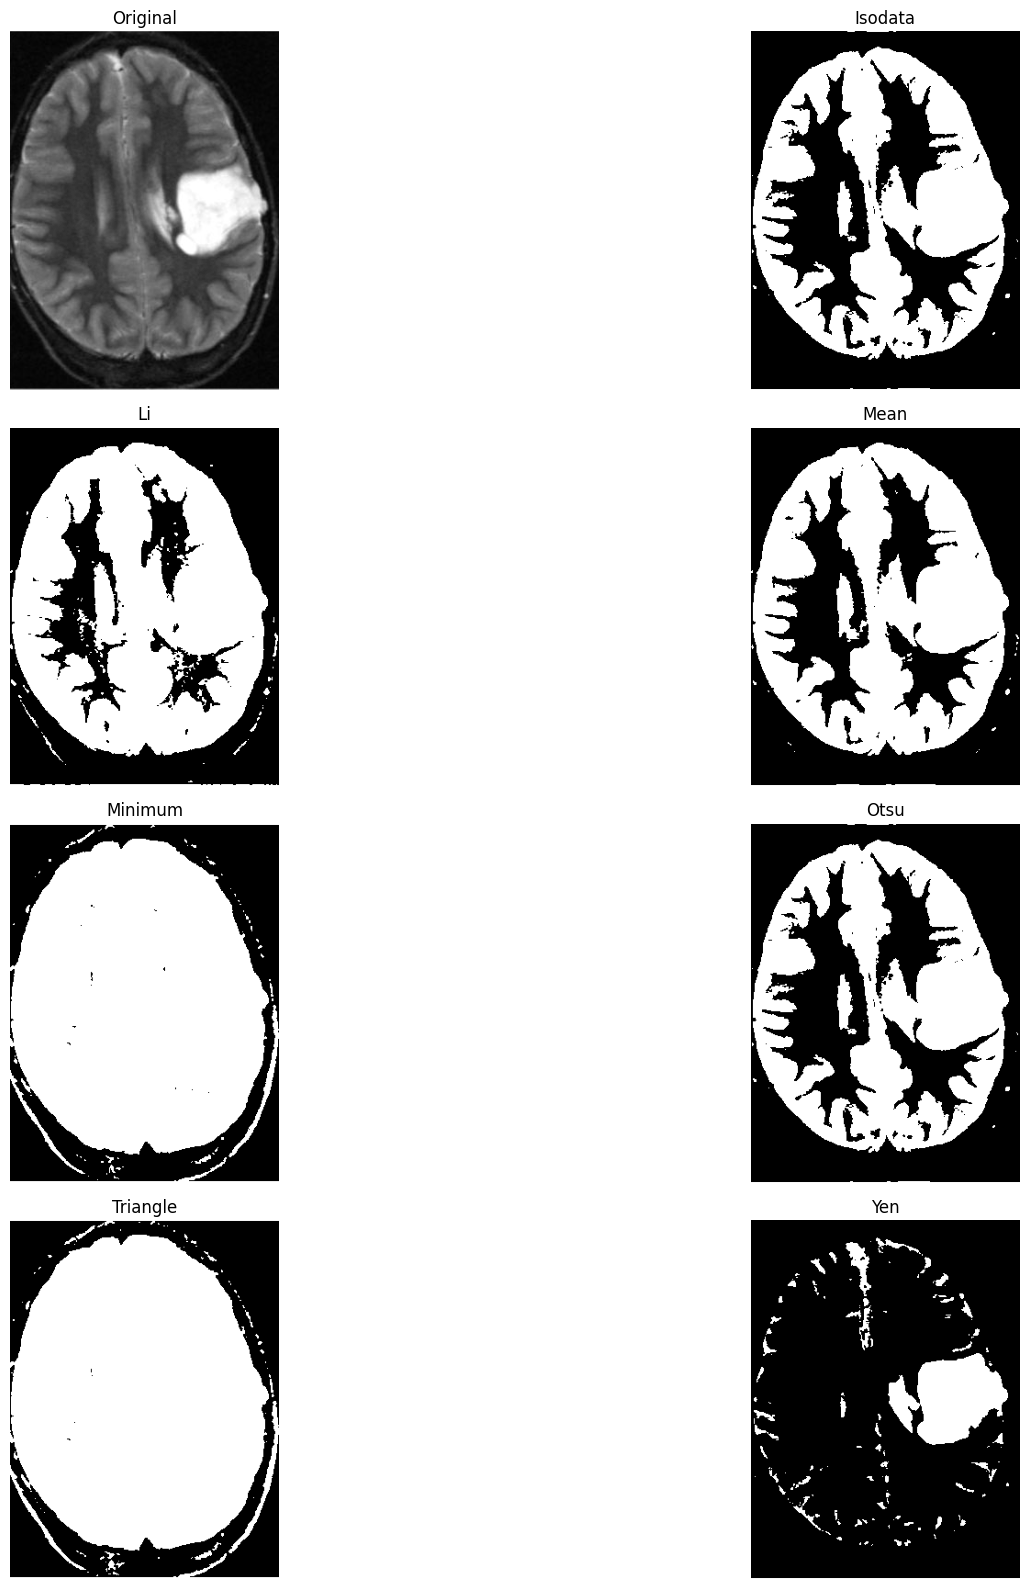

In [5]:
tumor = skimage.io.imread('brain_tumor.png') 

fig, ax = try_all_threshold(tumor, figsize=(20, 16), verbose=False)
plt.show()

threshold 222


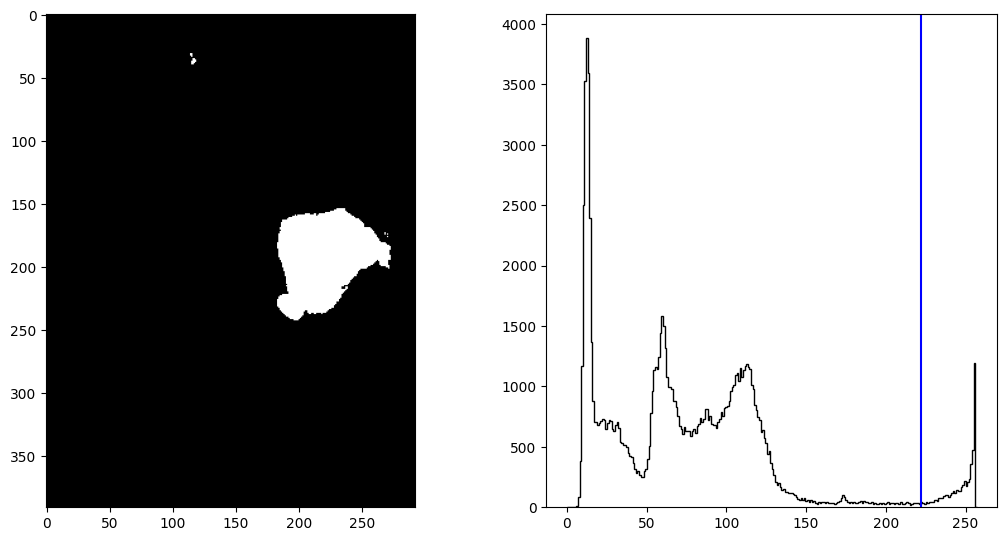

In [6]:
thresh = 222
print(f'threshold {thresh}')

threshold_img = tumor > thresh

counts, bins = np.histogram(tumor, bins=256, range=(0,257))

fig, (imgplot1, histogram1) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(12.8)
fig.set_figheight(6.4)
imgplot1.imshow(threshold_img, cmap = 'gray')
histogram1.hist(bins[:-1], bins, weights=counts, histtype='step', color='black')
histogram1.axvline(x = thresh, color = 'b')
plt.show()

TASK 3

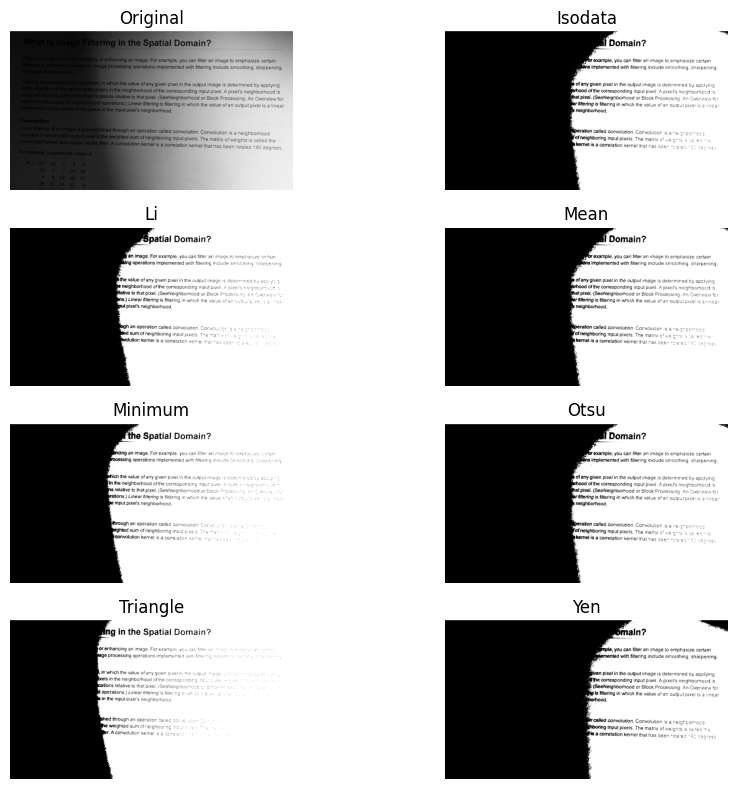

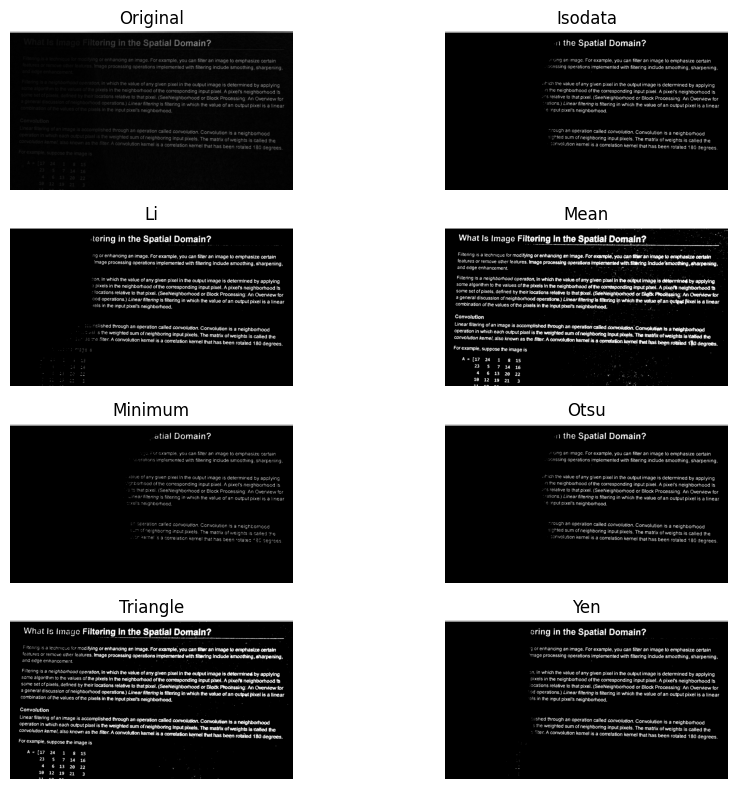

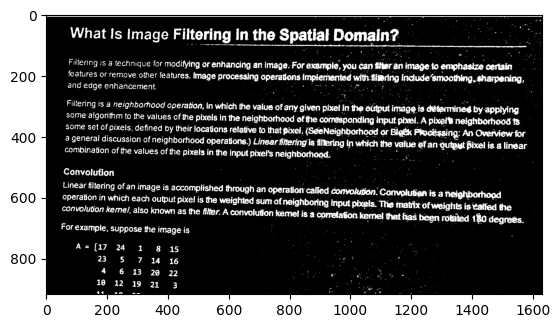

In [19]:
from skimage.filters.rank import maximum
from skimage.morphology import disk

text = skimage.io.imread('printed_text.png') 

fig, ax = try_all_threshold(text, figsize=(10, 8), verbose=False)
plt.show()

bg = maximum(text, disk(8))
text2 = bg - text
fig, ax = try_all_threshold(text2, figsize=(10, 8), verbose=False)
plt.show()

thresh_mean = threshold_mean(text2)
mean = text2 > thresh_mean
plt.imshow(mean, cmap='gray')
plt.show()

TASK 4

threshold 222


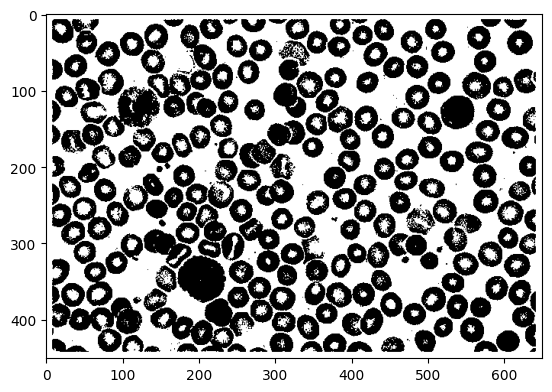

threshold 95


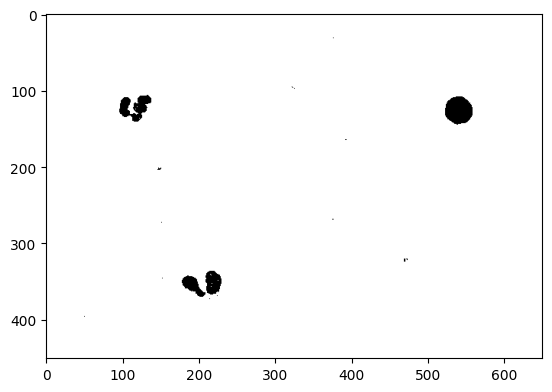

c:\Users\Jurek\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


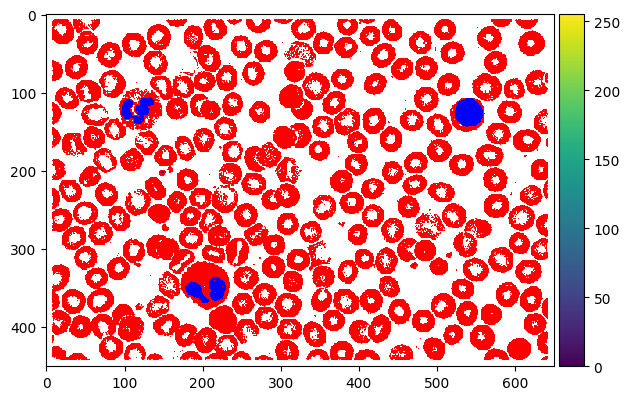

In [43]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

blood_smear = skimage.io.imread('blood_smear.jpg')
gray_blood_smear = rgb2gray(blood_smear)
thresh = 222
print(f'threshold {thresh}')

threshold_blood1 =  (gray_blood_smear > thresh) * 1

plt.imshow(threshold_blood1, cmap='gray')
plt.show()

thresh = 95
print(f'threshold {thresh}')

threshold_blood2 = (gray_blood_smear > thresh) * 1
plt.imshow(threshold_blood2, cmap='gray')
plt.show()

image = np.stack((threshold_blood2,) * 3, axis = -1)
image[np.where((image == [0, 0, 0]).all(axis = 2))] = [0,0,255]

image2 = np.stack((threshold_blood1,) * 3, axis = -1)
image2[np.where((image == [0, 0, 255]).all(axis = 2))] = [0,0,255]
image2[np.where((image2 == [0, 0, 0]).all(axis = 2))] = [255,0,0]

skimage.io.imshow(image2.astype('double'))

TASK 5

<class 'numpy.ndarray'>


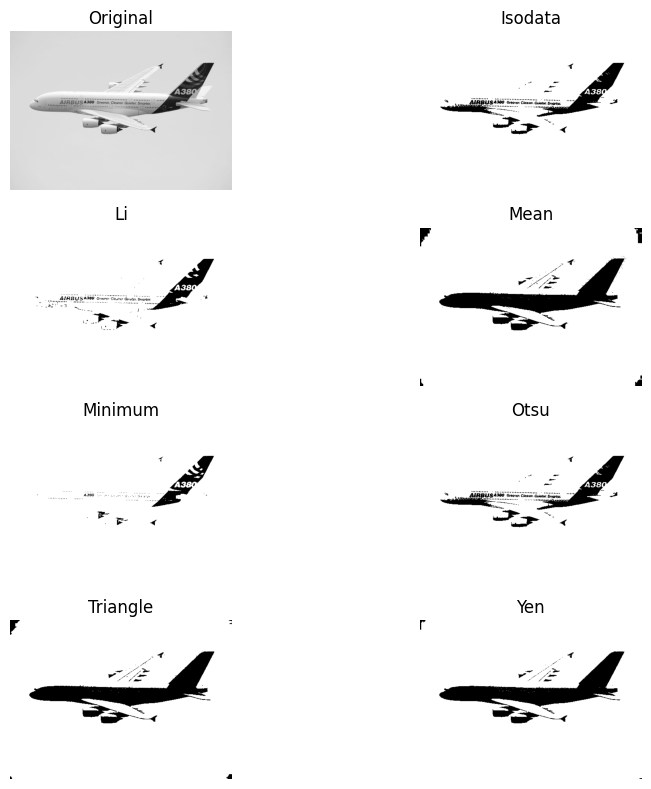

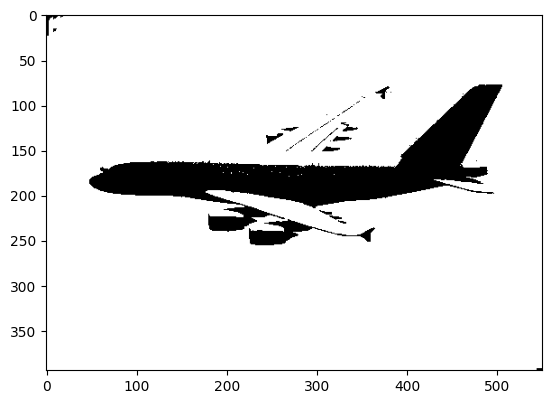

In [56]:
airbus = skimage.io.imread('airbus.png') 
gray_airbus = rgb2gray(airbus)
fig, ax = try_all_threshold(gray_airbus, figsize=(10, 8), verbose=False)
plt.show()
thresh = 210
threshold_airbus =  gray_airbus > thresh

plt.imshow(threshold_airbus, cmap='gray')
plt.show()


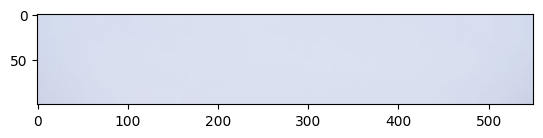

22.081417908180228


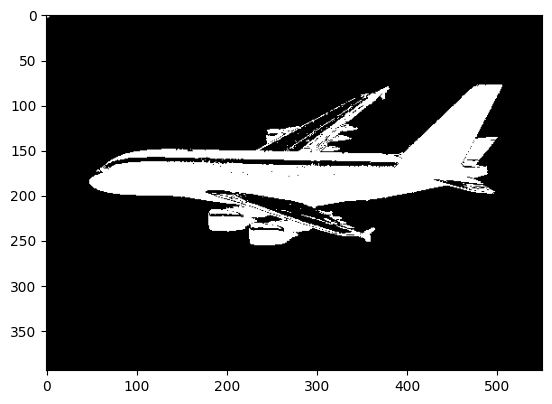

In [94]:
sky = airbus[:][-100:]

plt.imshow(sky)
plt.show()

rgb_vector = np.array([np.average(sky[:,:,0]),np.average(sky[:,:,1]),np.average(sky[:,:,2])])

maxDist = 0
for a in sky:
    for b in a:
        dist = np.linalg.norm(b-rgb_vector)
        if dist > maxDist:
            maxDist = dist

print(maxDist)

new_airbus = np.ones((394,550))
for a, index1 in zip(airbus, range(0,len(airbus))):
    for b, index2 in zip(a, range(0,len(a))):
        dist = np.linalg.norm(b-rgb_vector)
        if dist > maxDist:
            new_airbus[index1][index2] = 1
        else:
            new_airbus[index1][index2] = 0
            

plt.imshow(new_airbus, cmap='gray')
plt.show()